# 2. &nbsp; Basic biochemical reaction mechanisms

The following six biochemical reaction mechanisms all assume mass action kinetics. The corresponding ordinary differential equations (ODEs) are implemented below. All rate constants are set to $k = 1$ and the initial conditions to $y = 0.1$. The integration time is set to $t = 10$ and all the state variables are plotted over that time span for each mechanism.

In [1]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
# FIGURE INITIALIZATION
fig = plt.figure(figsize=(12, 6), dpi=300)
gs = plt.GridSpec(2, 3)

# GENERAL PARAMETERS
t_span = [0, 10]  # time span
t_eval = np.linspace(*t_span, 100)  # time points for plotting

### Mechanism A

<div style="display: flex; justify-content: space-around;">
<div style="width: 30%;">

$$
\text{Rate equation scheme}
$$

$$
\begin{align*}
& \xrightarrow{k_1} \text{A} \\[5pt]
\text{A} & \xrightarrow{k_2} \emptyset
\end{align*}
$$

</div>
<div style="width: 60%;">

$$
\text{System of ODEs}
$$

$$
\begin{align*}
\text{I}. & \quad \dot{[\text{A}]} = k_1 - k_2 [\text{A}]
\end{align*}
$$

</div>
</div>

In [ ]:
y0 = [0.1]  # initial condition

k1 = 1  # rate constant 1
k2 = 1  # rate constant 2
p = [k1, k2]  # parameters

def ode(t, y, k1, k2):
    return np.array(k1 - k2 * y)

results = solve_ivp(ode, t_span, y0, t_eval=t_eval, args=p)  # solve the IVP

ax = fig.add_subplot(gs[0, 0])
ax.plot(results.t, np.column_stack(results.y), label="A")
ax.set_title("Mechanism A")
ax.set_xlabel("Time $t$")
ax.set_ylabel("Concentration $x$")
ax.legend()

### Mechanism B

<div style="display: flex; justify-content: space-around;">
<div style="width: 30%;">

$$
\text{Rate equation scheme}
$$

$$
\begin{align*}
\text{A} + \text{B} & \xrightleftharpoons[k_{-1}]{k_1} \text{C}
\end{align*}
$$

</div>
<div style="width: 60%;">

$$
\text{System of ODEs}
$$

$$
\begin{align*}
\text{I}. & \quad \dot{[\text{A}]} = -k_1 [\text{A}] [\text{B}] + k_{-1} [\text{C}] \\
\text{II}. & \quad \dot{[\text{B}]} = -k_1 [\text{A}] [\text{B}] + k_{-1} [\text{C}] \\
\text{III}. & \quad \dot{[\text{C}]} = k_1 [\text{A}] [\text{B}] - k_{-1} [\text{C}]
\end{align*}
$$

</div>
</div>

In [ ]:
y0 = [0.1, 0.1, 0.1]  # initial condition

k_prod = 1  # production rate
k_deg = 1  # degradation rate
p = [k_prod, k_deg]  # parameters

def ode(t, y, k_prod, k_deg):
    dydt = np.array([
        -k_prod * y[0] * y[1] + k_deg * y[2],
        -k_prod * y[0] * y[1] + k_deg * y[2],
        k_prod * y[0] * y[1] - k_deg * y[2]
    ])
    return dydt

results = solve_ivp(ode, t_span, y0, t_eval=t_eval, args=p)  # solve the IVP

ax = fig.add_subplot(gs[0, 1])
ax.plot(results.t, results.y[0], label="A")
ax.plot(results.t, results.y[1], label="B", linestyle="dashed")
ax.plot(results.t, results.y[2], label="C")
ax.set_title("Mechanism B")
ax.set_xlabel("Time $t$")
ax.set_ylabel("Concentration $x$")
ax.legend()

### Mechanism C

<div style="display: flex; justify-content: space-around;">
<div style="width: 30%;">

$$
\text{Rate equation scheme}
$$

$$
\begin{aligned}
\text{A} + \text{A} \xrightarrow{k} \text{C}
\end{aligned}
$$

</div>
<div style="width: 60%;">

$$
\text{System of ODEs}
$$

$$
\begin{aligned}
\text{I}. & \quad \dot{[\text{A}]} = -2 k [\text{A}] [\text{A}] \\
\text{II}. & \quad \dot{[\text{C}]} = k [\text{A}] [\text{A}]
\end{aligned}
$$

</div>
</div>

In [ ]:
y0 = [0.1, 0.1]  # initial condition

k = 1  # production rate
p = [k]  # parameters

def ode(t, y, k):
    dydt = np.array([
        -2 * k * y[0] * y[0],
        k * y[0] * y[0]
    ])
    return dydt

results = solve_ivp(ode, t_span, y0, t_eval=t_eval, args=p)  # solve the IVP

ax = fig.add_subplot(gs[0, 2])
ax.plot(results.t, np.column_stack(results.y), label=["A", "C"])
ax.set_title("Mechanism C")
ax.set_xlabel("Time $t$")
ax.set_ylabel("Concentration $x$")
ax.legend()

### Mechanism D

<div style="display: flex; justify-content: space-around;">
<div style="width: 30%;">

$$
\text{Rate equation scheme}
$$

$$
\begin{align*}
\text{B} & \xrightarrow{k_1[\text{A}]} \text{C}
\end{align*}
$$

</div>
<div style="width: 60%;">

$$
\text{System of ODEs}
$$

$$
\begin{align*}
\text{I}. & \quad \dot{[\text{A}]} = 0  \\
\text{II}. & \quad \dot{[\text{B}]} = -k_1 [\text{A}] [\text{B}] \\
\text{III}. & \quad \dot{[\text{C}]} = k_1 [\text{A}] [\text{B}]
\end{align*}
$$

</div>
</div>

In [ ]:
y0 = [0.1, 0.1, 0.1]  # initial condition

k1 = 1  # production rate
p = [k1]  # parameters

def ode(t, y, k1):
    dydt = np.array([
        0,
        -k1 * y[0] * y[1],
        k1 * y[0] * y[1]
    ])
    return dydt

results = solve_ivp(ode, t_span, y0, t_eval=t_eval, args=p)  # solve the IVP

ax = fig.add_subplot(gs[1, 0])
ax.plot(results.t, np.column_stack(results.y), label=["A", "B", "C"])
ax.set_title("Mechanism D")
ax.set_xlabel("Time $t$")
ax.set_ylabel("Concentration $x$")
ax.legend()

### Mechanism E

<div style="display: flex; justify-content: space-around;">
<div style="width: 30%;">

$$
\text{Rate equation scheme}
$$

$$
\begin{align*}
\text{A} + \text{A} & \xrightleftharpoons[k_{-1}]{k_1} \text{AA} \\
\text{A} + \text{AA} & \xrightleftharpoons[k_{-1}]{k_1} \text{AAA}
\end{align*}
$$

</div>
<div style="width: 60%;">

$$
\text{System of ODEs}
$$

$$
\begin{align*}
\text{I}. & \quad \dot{[\text{A}]} = -k_1 [\text{A}] + \left( 2 [\text{A}] + [\text{AA}] \right) + k_{-1} \left( 2 [\text{AA}] + [\text{AAA}] \right) \\
\text{II}. & \quad \dot{[\text{AA}]} = k_1 [\text{A}] [\text{A}] + k_{-1} [\text{AAA}] - [\text{AA}] \left( k_1 [\text{A}] + k_{-1} \right) \\
\text{III}. & \quad \dot{[\text{AAA}]} = k_1 [\text{A}] [\text{AA}] - k_{-1} [\text{AAA}]
\end{align*}
$$

</div>
</div>

In [ ]:
y0 = [0.1, 0.1, 0.1]  # initial condition

k_prod = 1  # production rate
k_deg = 1  # degradation rate
p = [k_prod, k_deg]  # parameters

def ode(t, y, k_prod, k_deg):
    dydt = np.array([
        -k_prod * y[0] * (2 * y[0] + y[1]) + k_deg * (2 * y[1] + y[2]),
        k_prod * y[0] * y[0] + k_deg * y[2] - y[1] * (k_prod * y[0] + k_deg),
        k_prod * y[0] * y[1] - k_deg * y[2]
    ])
    return dydt

results = solve_ivp(ode, t_span, y0, t_eval=t_eval, args=p)  # solve the IVP

ax = fig.add_subplot(gs[1, 1])
ax.plot(results.t, np.column_stack(results.y), label=["A", "AA", "AAA"])
ax.set_title("Mechanism E")
ax.set_xlabel("Time $t$")
ax.set_ylabel("Concentration $x$")
ax.legend()

### Mechanism F

<div style="display: flex; justify-content: space-around;">
<div style="width: 30%;">

$$
\text{Rate equation scheme}
$$

$$
\begin{align*}
\text{A} & \xrightarrow{\; k_1 [\text{S}] \;} \text{A}^* \\
\text{B} & \xrightarrow{k_2 [\text{A}^*]} \text{B}^*
\end{align*}
$$

</div>
<div style="width: 60%;">

$$
\text{System of ODEs}
$$

$$
\begin{align*}
\text{I}. & \quad \dot{[\text{S}]} = 0 \\
\text{II}. & \quad \dot{[\text{A}]} = -k_1 [\text{S}] [\text{A}] \\
\text{III}. & \quad \dot{[\text{A}^*]} = k_1 [\text{S}] [\text{A}] \\
\text{IV}. & \quad \dot{[\text{B}]} = -k_1 [\text{A}^*] [\text{B}] \\
\text{V}. & \quad \dot{[\text{B}^*]} = k_1 [\text{A}^*] [\text{B}]
\end{align*}
$$

</div>
</div>

In [ ]:
y0 = [0.1, 0.1, 0.1, 0.1, 0.1]  # initial condition

k1 = 1
k2 = 1
p = [k1, k2]  # parameters

def ode(t, y, k1, k2):
    dydt = np.array([
        0,
        -k1 * y[0] * y[1],
        k1 * y[0] * y[1],
        -k2 * y[1] * y[2],
        k2 * y[1] * y[2]
    ])
    return dydt

results = solve_ivp(ode, t_span, y0, t_eval=t_eval, args=p)  # solve the IVP

ax = fig.add_subplot(gs[1, 2])
ax.plot(results.t, np.column_stack(results.y), label=["S", "A", "A*", "B", "B*"])
ax.set_title("Mechanism F")
ax.set_xlabel("Time $t$")
ax.set_ylabel("Concentration $x$")
ax.legend()

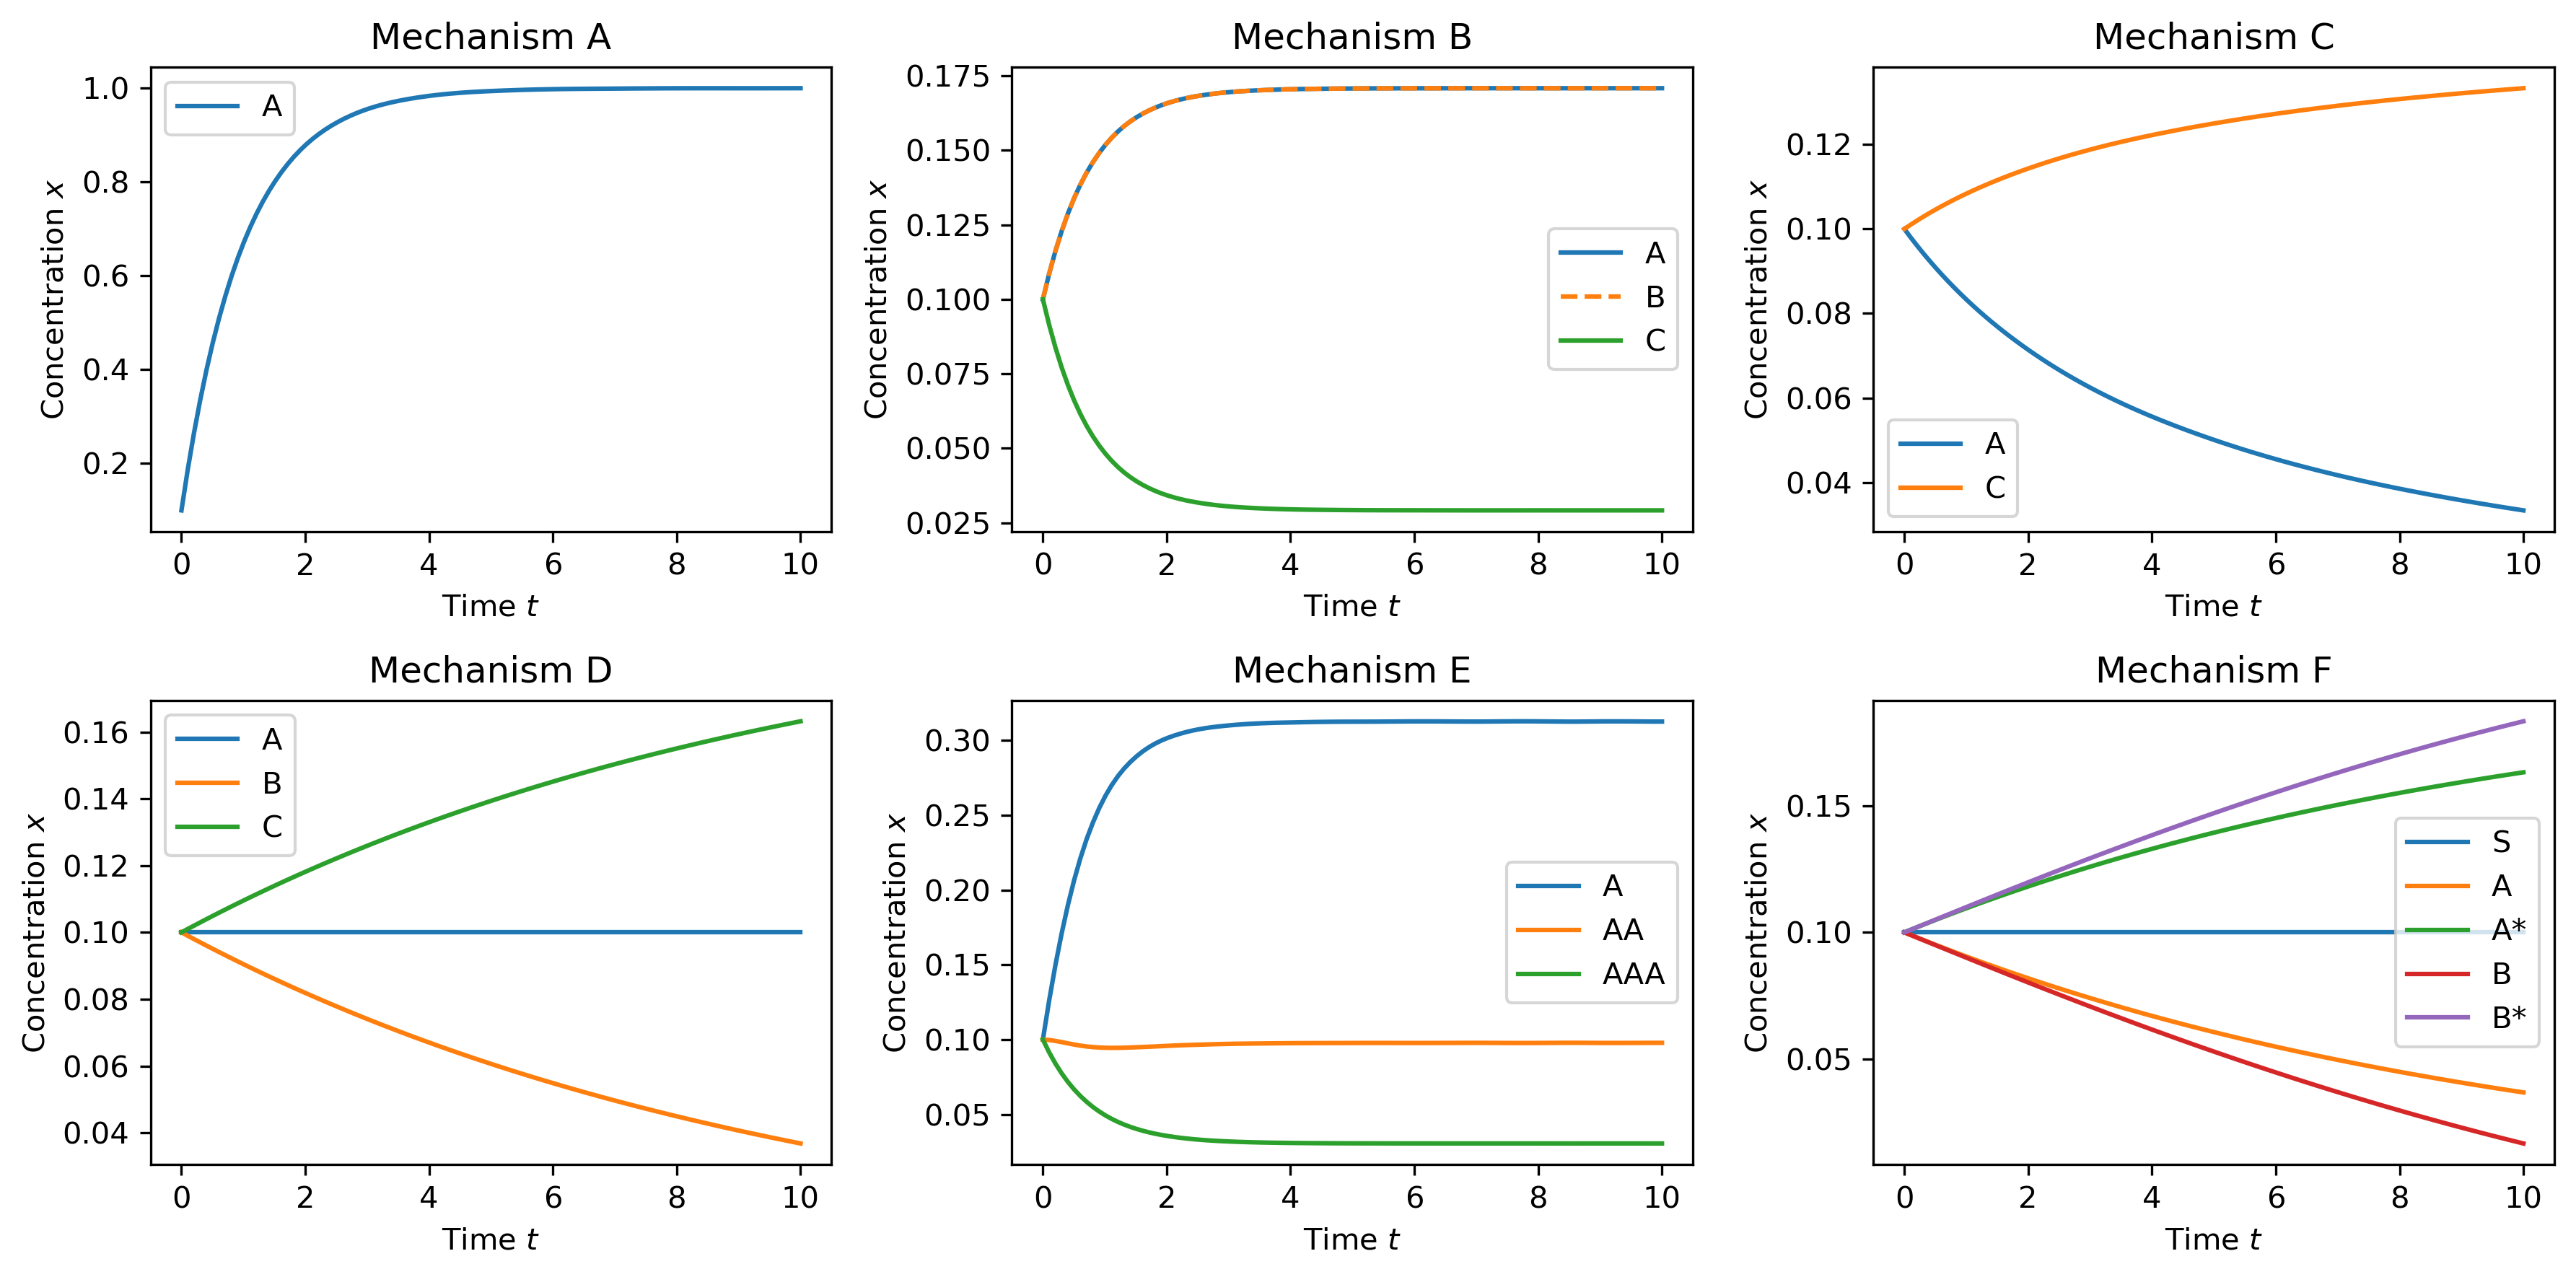

In [9]:
# PLOT THE FIGURE
fig.tight_layout()
fig